# SuperMarket Clustering Task
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Machine Learning Course

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory Data Analysis (EDA)

In [2]:
# Read Data
sup = pd.read_csv('/Users/mohammad/Downloads/ECommerce_consumer behaviour.csv')
sup

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


__Supermarket consumer behaviour__ dataset consists of 2019501 Rows & 12 Columns :
* order_id – (A unique number to identity the order)
* user_id - (A unique number to identify the user)
* order_number – (Number of the order)
* order_dow – (Day of the Week the order was made)
* order_hour_of_day – (Time of the order)
* days_since_prior_order - (History of the order)
* product_id – (Id of the product)
* add_to_cart_order – (Number of items added to cart)
* reordered – (If the reorder took place)
* department_id - (Unique number allocated to each department)
* department – (Names of the departments)
* product_name – (Name of the products)

In [3]:
sup.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,1.895159e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.138603e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,8.970980e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


In [4]:
sup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [5]:
sup.duplicated().sum()

0

In [6]:
sup.nunique()

order_id                  200000
user_id                   105273
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
dtype: int64

In [7]:
# Check for missing values
sup.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
imputer = IterativeImputer(random_state=42)
sup_handle_missing_value = imputer.fit_transform(sup.loc[:, 'order_id':'department_id'])
sup_imputed = pd.concat([pd.DataFrame(sup_handle_missing_value), sup[['department', 'product_name']]], axis=1)

In [10]:
sup_imputed.columns= sup.columns
sup_imputed

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083.0,49125.0,1.0,2.0,18.0,14.501533,17.0,1.0,0.0,13.0,pantry,baking ingredients
1,2425083.0,49125.0,1.0,2.0,18.0,14.651952,91.0,2.0,0.0,16.0,dairy eggs,soy lactosefree
2,2425083.0,49125.0,1.0,2.0,18.0,14.627221,36.0,3.0,0.0,16.0,dairy eggs,butter
3,2425083.0,49125.0,1.0,2.0,18.0,14.788901,83.0,4.0,0.0,4.0,produce,fresh vegetables
4,2425083.0,49125.0,1.0,2.0,18.0,14.843111,83.0,5.0,0.0,4.0,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742.0,199430.0,16.0,3.0,18.0,5.000000,83.0,8.0,0.0,4.0,produce,fresh vegetables
2019497,458285.0,128787.0,42.0,2.0,19.0,3.000000,115.0,1.0,1.0,7.0,beverages,water seltzer sparkling water
2019498,458285.0,128787.0,42.0,2.0,19.0,3.000000,32.0,2.0,1.0,4.0,produce,packaged produce
2019499,458285.0,128787.0,42.0,2.0,19.0,3.000000,32.0,3.0,1.0,4.0,produce,packaged produce


In [11]:
sup_imputed['days_since_prior_order'] = sup_imputed['days_since_prior_order'].astype(np.int64)

In [12]:
sup_imputed

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083.0,49125.0,1.0,2.0,18.0,14,17.0,1.0,0.0,13.0,pantry,baking ingredients
1,2425083.0,49125.0,1.0,2.0,18.0,14,91.0,2.0,0.0,16.0,dairy eggs,soy lactosefree
2,2425083.0,49125.0,1.0,2.0,18.0,14,36.0,3.0,0.0,16.0,dairy eggs,butter
3,2425083.0,49125.0,1.0,2.0,18.0,14,83.0,4.0,0.0,4.0,produce,fresh vegetables
4,2425083.0,49125.0,1.0,2.0,18.0,14,83.0,5.0,0.0,4.0,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742.0,199430.0,16.0,3.0,18.0,5,83.0,8.0,0.0,4.0,produce,fresh vegetables
2019497,458285.0,128787.0,42.0,2.0,19.0,3,115.0,1.0,1.0,7.0,beverages,water seltzer sparkling water
2019498,458285.0,128787.0,42.0,2.0,19.0,3,32.0,2.0,1.0,4.0,produce,packaged produce
2019499,458285.0,128787.0,42.0,2.0,19.0,3,32.0,3.0,1.0,4.0,produce,packaged produce


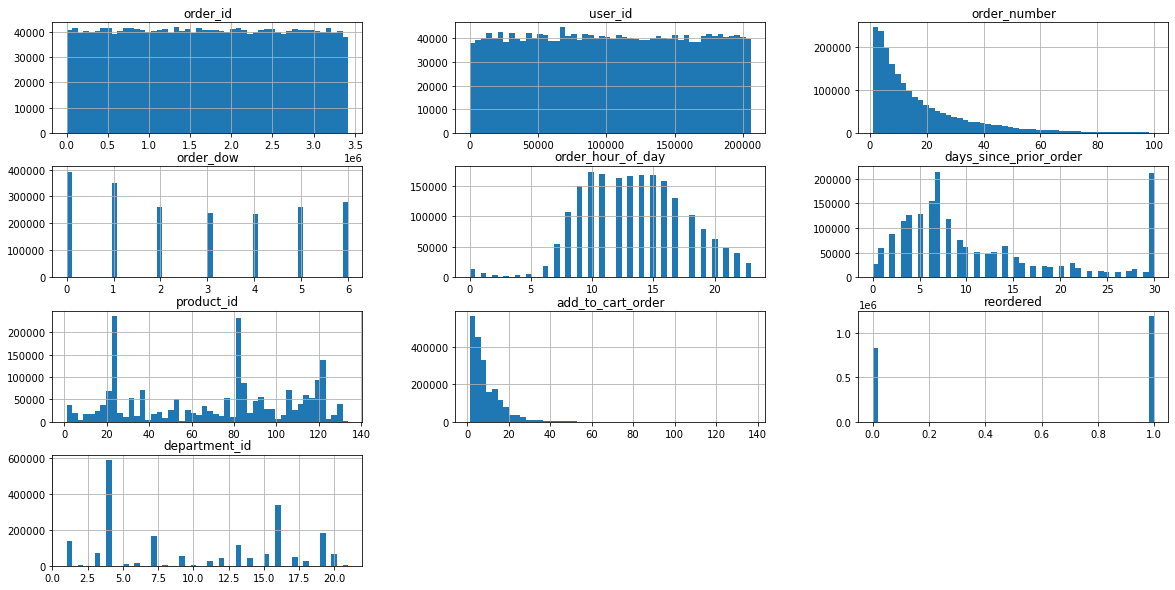

In [13]:
sup.hist(bins=50, figsize=(20, 10))
plt.show()

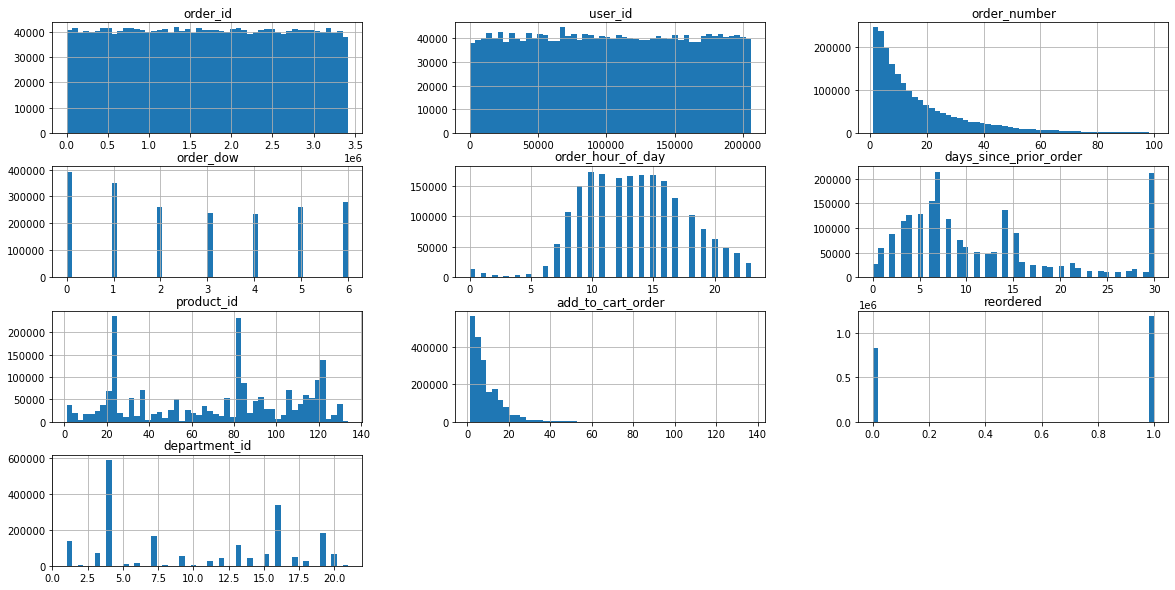

In [14]:
sup_imputed.hist(bins=50, figsize=(20, 10))
plt.show()

## Conclusion for this problem
Write a conclusion and references which you've used in your homework